# Body Pose Analysis
* pose_arr - raw 3D body pose data
* clean_poses - camera-view invariant 3d body poses
* poses_features - 3D body poses in feature space

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
import math
import cv2

In [2]:
def importImage(img):
    #Import image
    image = cv2.cvtColor(cv2.imread(img), cv2.COLOR_BGR2RGB)
    return image

## Import data 

In [3]:
#3D pose data - 2019/20 and 2020/21
pose_3d_df = pd.read_csv('../PenaltyData/poseData/pose_3d_19_20_20_21.csv', index_col=0)
pose_3d_2_df = pd.read_csv('../PenaltyData/poseData/pose_3d_17_18_18_19.csv', index_col=0)
pose_3d_2_df.dropna(inplace=True)
pose_arr_1 = pose_3d_df.loc[:,'0':].values
pose_arr_2 = pose_3d_2_df.loc[:,'0':].values
pose_arr = np.concatenate((pose_arr_1, pose_arr_2), axis=0)
#2D pose data
pose_2d_df = pd.read_csv('../PenaltyData/poseData/pose_2d_19_20_20_21.csv', index_col=0)
pose_2d_arr = pose_2d_df.loc[:,'0':].values

## Visualise Body Pose

In [4]:
def pose_to_matrix(pose):
    if len(pose) == 48:
        pose_matrix = pose.reshape(16, 3)
    else:
        pose_matrix = pose.reshape(16, 2)
    return pose_matrix

In [5]:
#2D plot of the 3D body pose in the x-y plane (ignoring z-axis)
def poseViz2D(ax, pose_3d):
    #pose_3d = pose_to_matrix(pose_matrix)
    #fig, ax = plt.subplots()
    for e in range(len(mpii_edges)):
        ax.plot(pose_3d[mpii_edges[e]][:, 0], -1*pose_3d[mpii_edges[e]][:, 1])

    ax.set_xlabel('x')
    ax.set_ylabel('y')
    #plt.show()

In [6]:
def plot3D(ax, points):
    ax.grid(False)
    oo = 1e10
    xmax,ymax,zmax = -oo,-oo,-oo
    xmin,ymin,zmin = oo, oo, oo
    edges = mpii_edges
    c='b'
    marker = 'o'
    points = points.reshape(-1, 3)
    x, y, z = np.zeros((3, points.shape[0]))
    for j in range(points.shape[0]):
        x[j] = points[j, 0].copy()
        y[j] = points[j, 2].copy()
        z[j] = -points[j, 1].copy()
        xmax = max(x[j], xmax)
        ymax = max(y[j], ymax)
        zmax = max(z[j], zmax)
        xmin = min(x[j], xmin)
        ymin = min(y[j], ymin)
        zmin = min(z[j], zmin)
    ax.scatter(x, y, z, s = 100, c = c, marker = marker)
    for e in edges:
        ax.plot(x[e], y[e], z[e], c = c)
    max_range = np.array([xmax-xmin, ymax-ymin, zmax-zmin]).max()
    Xb = 0.5*max_range*np.mgrid[-1:2:2,-1:2:2,-1:2:2][0].flatten() + 0.5*(xmax+xmin)
    Yb = 0.5*max_range*np.mgrid[-1:2:2,-1:2:2,-1:2:2][1].flatten() + 0.5*(ymax+ymin)
    Zb = 0.5*max_range*np.mgrid[-1:2:2,-1:2:2,-1:2:2][2].flatten() + 0.5*(zmax+zmin)
    for xb, yb, zb in zip(Xb, Yb, Zb):
        ax.plot([xb], [yb], [zb], 'w')

In [7]:
mpii_edges = [[0, 1], [1, 2], [2, 6], [6, 3], [3, 4], [4, 5], 
              [10, 11], [11, 12], [12, 8], [8, 13], [13, 14], [14, 15], 
              [6, 8], [8, 9]]

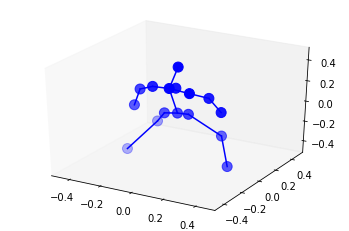

In [8]:
points = pose_to_matrix(pose_arr[132])
fig = plt.figure()
ax = fig.add_subplot((111),projection='3d')
plot3D(ax, points)
plt.show()

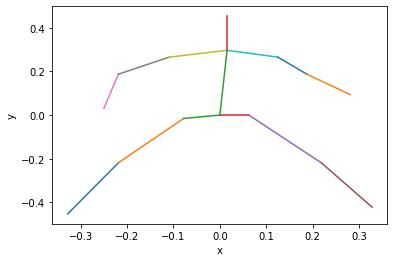

In [9]:
fig,ax = plt.subplots()
poseViz2D(ax, pose_to_matrix(pose_arr[132]))
plt.show()

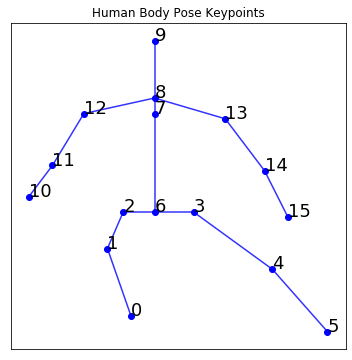

In [21]:
#Viz to show keypoint locations
pose_3d = pose_to_matrix(pose_arr[159])
fig, ax = plt.subplots(figsize=(6, 6))
for e in range(len(mpii_edges)):
    ax.plot(pose_3d[mpii_edges[e]][:, 0], -pose_3d[mpii_edges[e]][:, 1], c='b', alpha=0.8)
for keypoint in range(len(pose_3d)):
    ax.scatter(pose_3d[keypoint][:2][0], -pose_3d[keypoint][:2][1], c='b')
    ax.annotate(str(keypoint), (pose_3d[keypoint][:2][0], -pose_3d[keypoint][:2][1]), fontsize=18)
ax.set_yticks([])
ax.set_xticks([])
plt.title('Human Body Pose Keypoints')
#plt.savefig('viz/keypoints.png', dpi=400)
plt.show()

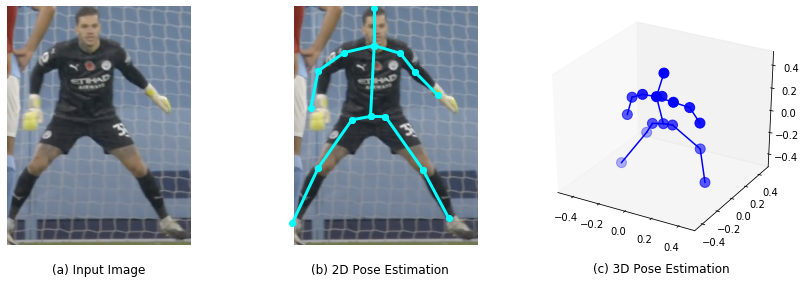

In [31]:
#Human Body Pose Estimation Example
#Show image, image with 2D pose overlay, and 3D pose estimate
image = importImage('../PenaltyData/prem_19_20_20_21/f132.png')
pose_2d = pose_to_matrix(pose_2d_arr[132])
points = pose_to_matrix(pose_arr[132])

fig = plt.figure(figsize=(12, 4))
#fig.patch.set_visible(False)
ax = fig.add_subplot(1, 3, 1)
ax.imshow(image)
ax.set_yticks([])
ax.set_xticks([])
ax.axis('off')
ax.set_title('(a) Input Image', y=-0.14)

ax = fig.add_subplot(1, 3, 2)
ax.imshow(image)
for e in range(len(mpii_edges)):
    ax.plot(pose_2d[mpii_edges[e]][:, 0], pose_2d[mpii_edges[e]][:, 1], c='cyan', lw=3, marker='o')
ax.set_yticks([])
ax.set_xticks([])
ax.axis('off')
ax.set_title('(b) 2D Pose Estimation', y=-0.14)
    
ax = fig.add_subplot(1, 3, 3, projection='3d')
plot3D(ax, points)
ax.set_title('(c) 3D Pose Estimation', y=-0.15)
plt.tight_layout()
#plt.savefig('viz/poseEstimationExample.png', dpi=500)
plt.show()

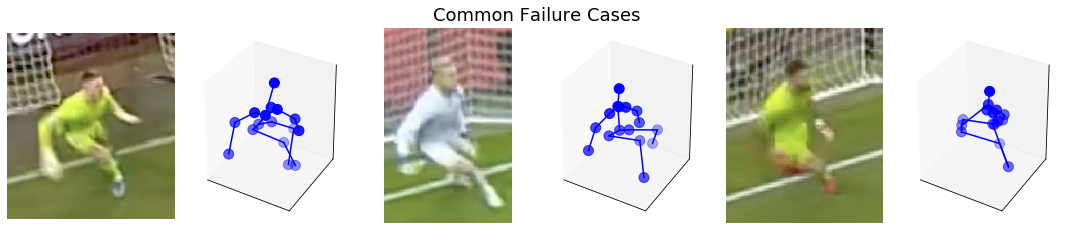

In [95]:
#Common Failure Cases
path = '../PenaltyData/prem_19_20_20_21/f'
fig = plt.figure(figsize=(15, 3))

ax = fig.add_subplot(1, 6, 1)
ax.imshow(importImage(path + str(34) + '.png'))
ax.set_yticks([])
ax.set_xticks([])
ax.axis('off')
ax = fig.add_subplot(1, 6, 2, projection='3d')
plot3D(ax, pose_to_matrix(pose_arr[34]))
ax.set_yticks([])
ax.set_xticks([])
ax.set_zticks([])

ax = fig.add_subplot(1, 6, 3)
ax.imshow(importImage(path + str(17) + '.png'))
ax.set_yticks([])
ax.set_xticks([])
ax.axis('off')
ax = fig.add_subplot(1, 6, 4, projection='3d')
plot3D(ax, pose_to_matrix(pose_arr[17]))
ax.set_yticks([])
ax.set_xticks([])
ax.set_zticks([])

ax = fig.add_subplot(1, 6, 5)
ax.imshow(importImage(path + str(3) + '.png'))
ax.set_yticks([])
ax.set_xticks([])
ax.axis('off')
ax = fig.add_subplot(1, 6, 6, projection='3d')
plot3D(ax, pose_to_matrix(pose_arr[3]))
ax.set_yticks([])
ax.set_xticks([])
ax.set_zticks([])

plt.suptitle('Common Failure Cases', y=1.05, fontsize=18)
plt.tight_layout()
plt.savefig('viz/failurecases.png', dpi=500, bbox_inches='tight')
plt.show()

## Data Cleaning / Feature Extraction
### Rotate 3D Body Pose
* Find rotation in y axis of 3D body pose such that the range of the 2D projection in the x-coordinate direction is maximised
* Could experiment with rotation about the x to normalise for camera height, but this appears to have minimal effect.

In [10]:
def rotatePose(pose_3d, theta):
    #Rotate body pose by theta degrees around the y axis
    #Input: pose_3d - 16x3 array representing the coordinates of the body pose
    #Returns: 16x3 array of rotated body pose coordinates
    radian = math.radians(theta)

    rotation_matrix = np.array([[np.cos(radian), 0, np.sin(radian)],
                                [0, 1, 0],
                                [-np.sin(radian), 0, np.cos(radian)]])

    rotated_pose = np.zeros((len(pose_3d), 3))
    for i in range(len(pose_3d)):
        rotated_pose[i] = rotation_matrix @ pose_3d[i]
    return rotated_pose

In [11]:
def hipWidth(pose_3d):
    #Input: pose_3d - 16x3 np array representing a single 3D body pose
    #Returns euclidean distance in x-y space of the two hip joints
    #Indices of both hip locations are 2 and 3.
    return np.linalg.norm(pose_3d[3][:2]-pose_3d[2][:2])

In [12]:
def cameraInvariantPose(pose_3d):
    # Function to get the optimal rotated pose
    best_pose = pose_3d
    max_hip_width = hipWidth(pose_3d)
    theta_ranges = list(range(10, 100, 10)) + list(range(270, 360, 10))

    for theta in theta_ranges:
        rotated_pose = rotatePose(pose_3d, theta=theta)
        hip_width = hipWidth(rotated_pose)
        if hip_width > max_hip_width:
            best_pose = rotated_pose
            max_hip_width = hip_width
    return best_pose

In [13]:
def cameraInvariantDataset(raw_poses):
    #Converts the raw body point dataset to a cleaned camera-invariant one
    cleaned_pose_arr = raw_poses.copy()
    for i in range(len(raw_poses)):
        pose_3d = pose_to_matrix(raw_poses[i])
        best_pose = cameraInvariantPose(pose_3d)
        cleaned_pose_arr[i] = best_pose.flatten()
    return cleaned_pose_arr

In [14]:
#Get camera-view invariant dataset of 3d poses
clean_poses = cameraInvariantDataset(pose_arr)

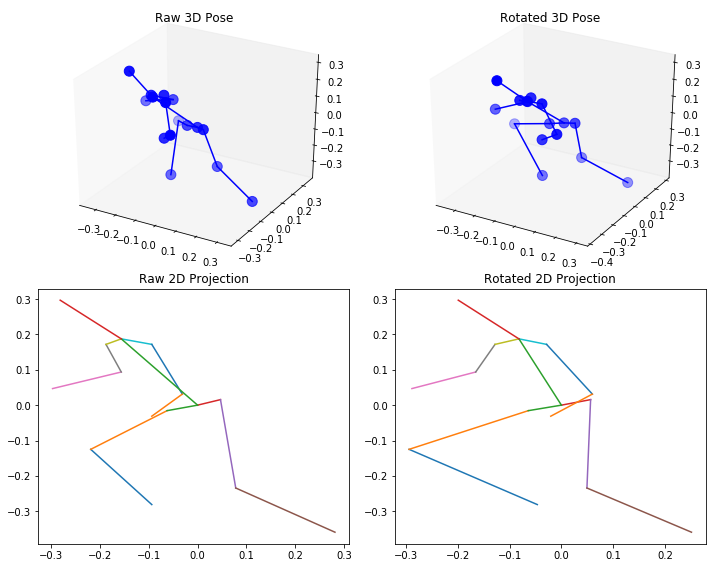

In [114]:
#Camera-view invariance example
pose_id = 140
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(2, 2, 1, projection='3d')
plot3D(ax, pose_to_matrix(pose_arr[pose_id]))
ax.set_title('Raw 3D Pose')
ax = fig.add_subplot(2, 2, 2, projection='3d')
plot3D(ax, pose_to_matrix(clean_poses[pose_id]))
ax.set_title('Rotated 3D Pose')
ax = fig.add_subplot(2, 2, 3)
poseViz2D(ax, pose_to_matrix(pose_arr[pose_id]))
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title('Raw 2D Projection')
ax = fig.add_subplot(2, 2, 4)
poseViz2D(ax, pose_to_matrix(clean_poses[pose_id]))
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title('Rotated 2D Projection')
plt.tight_layout()
plt.savefig('viz/camera_invariance.png', dpi=500)
plt.show()

### Extract Features From Body Pose
* Distance of Forward Step - Absolute value of difference in z-coordinate of two feet (effectively the difference in depth between both feet)
* Body Angle - angle made by 2d vector given by the 7th index keypoint
* Distance of arms from torso
* Leg Span
* Body Height - |max(y) - min(y)|

In [15]:
def torsoAngle(pose_3d):
    #Torso Angle
    torso_angle = math.atan2(pose_3d[7][0], -pose_3d[7][1])*180/math.pi
    return torso_angle

In [16]:
def bodyHeight(pose_3d):
    #Body Height
    height = np.abs(np.max(-pose_3d[:, 1]) - np.min(-pose_3d[:, 1]))
    return height

In [17]:
def forwardStep(pose_3d):
    #Distance of forward step
    forward_step = np.abs(pose_3d[0][2] - pose_3d[5][2])
    return forward_step

In [18]:
def handHeight(pose_3d):
    hand_height = np.abs(np.min(-pose_3d[:, 1]) - np.min(-pose_3d[[10, 15]][:, 1]))
    return hand_height

In [19]:
def bodyAngle(pose_3d):
    midpoint = (pose_3d[0][:2] + pose_3d[5][:2])/2
    midpoint[1] *= -1
    torso = pose_3d[7][:2] * np.array([1, -1])
    body_angle_vec = torso-midpoint
    return math.atan2(body_angle_vec[0], body_angle_vec[1])*180/math.pi

In [20]:
def PosesFeatureSpace(clean_poses):
    #Input: clean_poses - dataset off all of the camera-invariant poses
    #Returns: dataset of poses in feature space
    pose_features = np.zeros((len(clean_poses), 5))
    for i in range(len(clean_poses)):
        pose_3d = pose_to_matrix(clean_poses[i])
        feature_array = np.array([torsoAngle(pose_3d), bodyHeight(pose_3d), 
                                  forwardStep(pose_3d), handHeight(pose_3d),
                                  bodyAngle(pose_3d)])
        pose_features[i] = feature_array
    return pose_features

In [22]:
pose_3d = pose_to_matrix(clean_poses[205])
pose_3d

array([[-0.37647482,  0.375     ,  0.02444412],
       [-0.2151585 ,  0.1875    ,  0.21946816],
       [-0.08167936, -0.03125   , -0.01332272],
       [ 0.07876701,  0.03125   , -0.00319402],
       [ 0.08264665,  0.171875  , -0.07117231],
       [-0.11946471,  0.390625  , -0.13763333],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.11227563, -0.25      , -0.0830996 ],
       [ 0.09713089, -0.25      , -0.16898966],
       [ 0.18519839, -0.390625  , -0.11943797],
       [-0.19657562,  0.        , -0.12504705],
       [-0.1652233 , -0.1875    , -0.03722   ],
       [ 0.00058839, -0.28125   , -0.08664388],
       [ 0.25011238, -0.203125  , -0.11121564],
       [ 0.28782109, -0.0625    , -0.07732048],
       [ 0.25381197,  0.140625  , -0.18021501]])

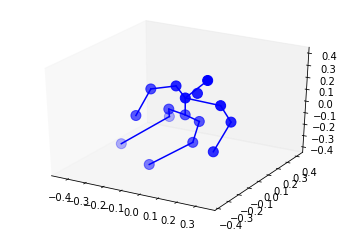

Torso Angle: 24.184967654103637
Vertical Height: 0.78125
Forward Step: 0.16207745040148103
Hand Height: 0.25
Body Angle: 29.651849813857496


In [24]:
#fig, ax = plt.subplots()
fig = plt.figure()
ax = fig.add_subplot((111),projection='3d')
plot3D(ax, pose_3d)
plt.show()
print('Torso Angle:', torsoAngle(pose_3d))
print('Vertical Height:', bodyHeight(pose_3d))
print('Forward Step:', forwardStep(pose_3d))
print('Hand Height:', handHeight(pose_3d))
print('Body Angle:', bodyAngle(pose_3d))

In [25]:
#Computes dataset containing all of the camera-invariant poses in feature space
#Angle, Body Height, Forward Step
poses_features = PosesFeatureSpace(clean_poses)
#Normalise features (change if any features include negative values)
#poses_features = poses_features / poses_features.max(axis=0)

### EDA - Pose Features

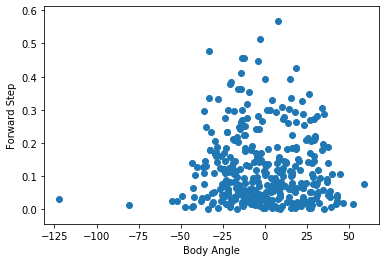

In [28]:
#Forward Step against Body Angle
plt.scatter(poses_features[:,4], poses_features[:, 2])
plt.xlabel('Body Angle')
plt.ylabel('Forward Step')
plt.savefig('viz/angle_fstep.png', dpi=500)
plt.show()

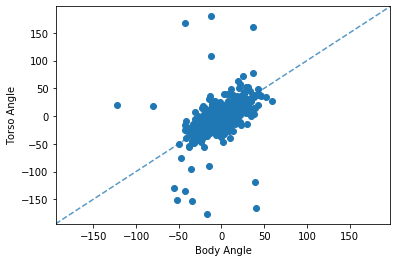

In [35]:
#Check for correlation in body angle vs torso angle
fig, ax = plt.subplots()
ax.scatter(poses_features[:,4], poses_features[:, 0])
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]
# now plot both limits against eachother
ax.plot(lims, lims, '--', alpha=0.75, zorder=0)
ax.set_xlim(lims)
ax.set_ylim(lims)
plt.xlabel('Body Angle')
plt.ylabel('Torso Angle')
plt.savefig('viz/angle_correlation.png', dpi=500)
plt.show()

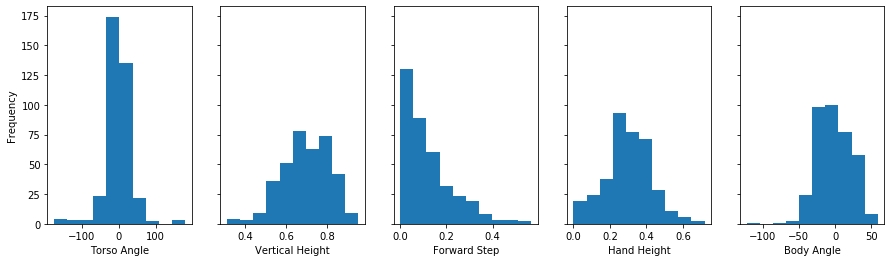

In [48]:
#Histograms of all self-created pose features
num_hist = poses_features.shape[1]
xlabs = ['Torso Angle', 'Vertical Height', 'Forward Step', 'Hand Height', 'Body Angle']
#Show histogram of all self-created body pose features
fig, ax = plt.subplots(nrows=1, ncols=num_hist, figsize=(15, 4), sharey=True)
for i in range(num_hist):
    ax[i].hist(poses_features[:, i])
    ax[i].set_xlabel(xlabs[i])
ax[0].set_ylabel('Frequency')
plt.savefig('viz/feature_hists.png', dpi=500)
plt.show()

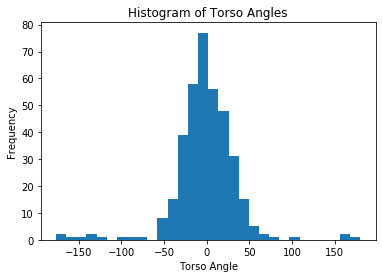

In [38]:
#Histogram of Torso Angle
plt.hist(poses_features[:, 0], bins=30)
#plt.vlines(np.mean(poses_features[:, 0]), 0, 80, ls='--')
plt.title('Histogram of Torso Angles')
plt.xlabel('Torso Angle')
plt.ylabel('Frequency')
#plt.savefig('viz/hist_torso_angles.png',dpi=500)
plt.show()
#print(np.mean(poses_features[:, 0]))

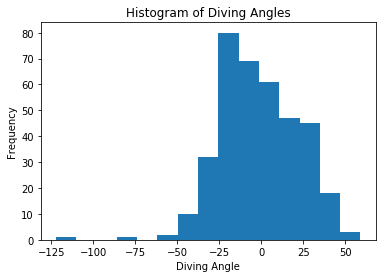

In [144]:
#Histogram of Diving Angle
#Seems diving right is the most common dive angle - perhaps because most right footers go
#to the keepers right
plt.hist(poses_features[:, 4], bins=15)
#plt.vlines(np.mean(poses_features[:, 4]), 0, 40, ls='--')
plt.title('Histogram of Diving Angles')
plt.xlabel('Diving Angle')
plt.ylabel('Frequency')
plt.savefig('viz/hist_dive_angles.png',dpi=500)
plt.show()

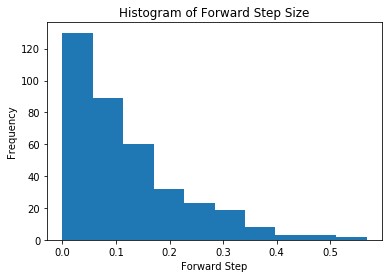

In [145]:
#Histogram of Forward Step Size
plt.hist(poses_features[:, 2], bins=10)
plt.title('Histogram of Forward Step Size')
plt.xlabel('Forward Step')
plt.ylabel('Frequency')
plt.savefig('viz/hist_forward_step.png',dpi=500)
plt.show()

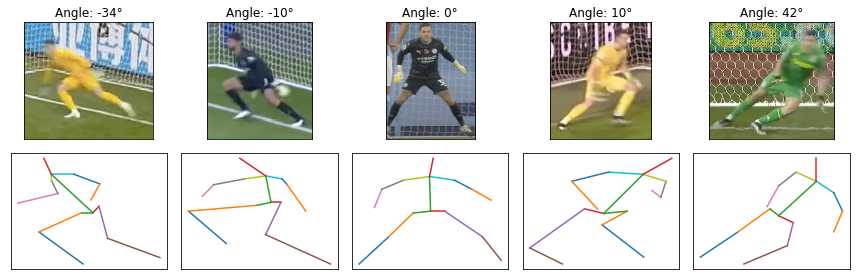

In [88]:
#Visualisation to show examples of diving angle
pose_ids = [1, 135, 132, 167, 190]
angle0 = pose_to_matrix(clean_poses[132])
angle10 = pose_to_matrix(clean_poses[167])
angle42 = pose_to_matrix(clean_poses[190])
angle_10 = pose_to_matrix(clean_poses[135])
angle_35 = pose_to_matrix(clean_poses[1])
angle_poses = [angle_35, angle_10, angle0, angle10, angle42]

%matplotlib inline
fig, ax = plt.subplots(nrows=2, ncols=len(angle_poses), figsize=(12, 4))
for i in range(len(angle_poses)):
    pose_3d = angle_poses[i]
    for e in range(len(mpii_edges)):
        ax[1,i].plot(pose_3d[mpii_edges[e]][:, 0], -1*pose_3d[mpii_edges[e]][:, 1])
    image = importImage('../PenaltyData/prem_19_20_20_21/f' + str(pose_ids[i]) + '.png')
    ax[0,i].imshow(image)
    ax[1,i].set_xticks([])
    ax[0,i].set_xticks([])
    ax[0,i].set_yticks([])
    ax[1,i].set_yticks([])
    ax[0,i].set_title('Angle: ' + str(int(poses_features[pose_ids[i]][4])) + '°')
plt.tight_layout()
plt.savefig('viz/dive_angles.png', dpi=500)
plt.show()

## Clustering
### K-Means 

In [49]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [79]:
def silhouetteInertia(poses):
    #Silhouette scores and inertia to find optimal number of clusters, k
    silhouette = []
    inertia = []
    for k in range(2, 11):
        kmeans = KMeans(n_clusters=k)
        clusters = kmeans.fit_predict(poses)
        silhouette.append(silhouette_score(poses, clusters))
        inertia.append(kmeans.inertia_)
    return (silhouette, inertia)

In [58]:
sil_raw, iner_raw = silhouetteInertia(pose_arr)
sil_cvi, iner_cvi = silhouetteInertia(clean_poses)
sil_fea, iner_fea = silhouetteInertia(poses_features)

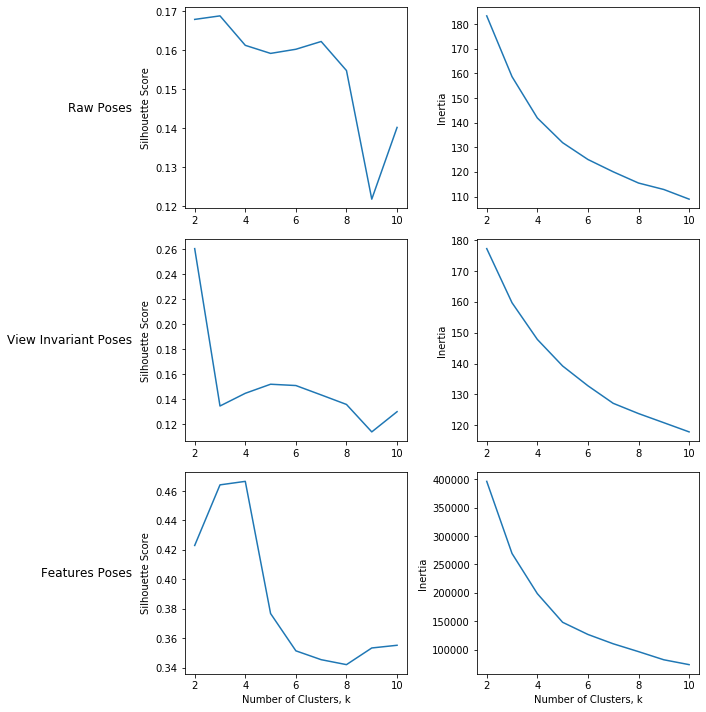

In [78]:
x = list(range(2, 11))
rows = ['Raw Poses', 'View Invariant Poses', 'Features Poses']
pad = 5

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 10))
axes[0, 0].plot(x, sil_raw)
axes[0, 1].plot(x, iner_raw)
axes[1, 0].plot(x, sil_cvi)
axes[1, 1].plot(x, iner_cvi)
axes[2, 0].plot(x, sil_fea)
axes[2, 1].plot(x, iner_fea)
axes[2, 0].set_xlabel('Number of Clusters, k')
axes[2, 1].set_xlabel('Number of Clusters, k')
for i in range(3):
    axes[i, 0].set_ylabel('Silhouette Score')
    axes[i, 1].set_ylabel('Inertia')
    
for ax, row in zip(axes[:,0], rows):
    ax.annotate(row, xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - pad, 0),
                xycoords=ax.yaxis.label, textcoords='offset points',
                size='large', ha='right', va='center')
    
plt.tight_layout()
plt.savefig('viz/silhouette_inertia.png', dpi=500)
plt.show()

In [27]:
k = 4

In [28]:
def getKMeans(poses, k):
    kmeans = KMeans(n_clusters=k)
    clusters_kmeans = kmeans.fit_predict(pose_arr)
    return kmeans

In [29]:
#KMeans Raw Dataset
kmeans_raw = getKMeans(pose_arr, k=k)

In [30]:
kmeans_clean = getKMeans(clean_poses, k=k)

In [31]:
kmeans_features = getKMeans(poses_features, k=k)

In [32]:
np.where(kmeans_features.labels_ == 1)[0]

array([  0,   3,   4,   5,   6,   8,  28,  30,  78,  79,  83,  87,  92,
        96,  97,  99, 108, 109, 116, 118, 122, 129, 161, 165, 166, 167,
       172, 180, 193, 203, 218, 223, 225, 230, 231, 232, 243, 247, 253,
       263, 266, 270, 275, 278, 279, 287, 288, 292, 293, 296, 298, 299,
       303, 306, 307, 310, 316, 319, 321, 323, 324, 334, 339, 343, 347,
       349, 353, 355, 358, 362, 364])

In [33]:
def showClusterExamples(model_labels, poses, n_examples, k):
    pose_ids = np.zeros((n_examples, k))
    fig, ax = plt.subplots(nrows=n_examples, ncols=k)
    for i in range(k):
        image_ids = np.where(model_labels == i)[0]
        image_ids = image_ids[image_ids < 217]
        pose_ids[:, i] = np.random.choice(image_ids, n_examples, replace=False)
    for i in range(n_examples):
        for j in range(k):
            pose_3d = pose_to_matrix(poses[int(pose_ids[i, j])])
            for e in range(len(mpii_edges)):
                ax[i,j].plot(pose_3d[mpii_edges[e]][:, 0], -pose_3d[mpii_edges[e]][:, 1], c='b')
            #for keypoint in range(len(pose_3d)):
                #ax[i,j].scatter(pose_3d[keypoint][:2][0], -pose_3d[keypoint][:2][1], c='b')
            ax[i,j].set_xticks([])
            ax[i,j].set_yticks([])
    plt.tight_layout()
    plt.show()

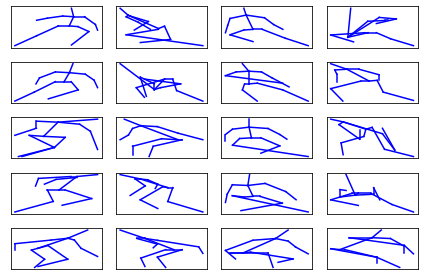

In [34]:
#Cluster 0 examples
n_examples = 5
showClusterExamples(kmeans_raw.labels_, pose_arr, n_examples, k)

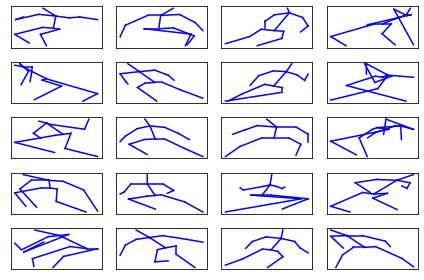

In [35]:
showClusterExamples(kmeans_clean.labels_, clean_poses, n_examples, k)

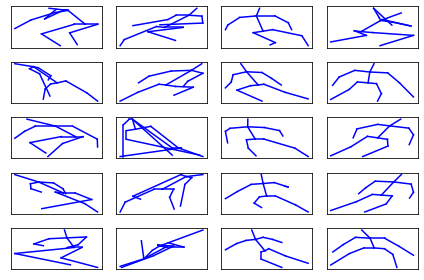

In [36]:
showClusterExamples(kmeans_features.labels_, clean_poses, n_examples, k)

In [37]:
def showClusterExamplesImg(model_labels, poses, n_examples, k):
    path = '../PenaltyData/prem_19_20_20_21/'
    pose_ids = np.zeros((n_examples, k))
    fig, ax = plt.subplots(nrows=n_examples, ncols=k)
    for i in range(k):
        image_ids = np.where(model_labels == i)[0]
        image_ids = image_ids[image_ids < 217]
        pose_ids[:, i] = np.random.choice(image_ids, n_examples, replace=False)
    for i in range(n_examples):
        for j in range(k):
            img = importImage(path + 'f' + str(int(pose_ids[i, j])) + '.png')
            ax[i,j].imshow(img)
            #for keypoint in range(len(pose_3d)):
                #ax[i,j].scatter(pose_3d[keypoint][:2][0], -pose_3d[keypoint][:2][1], c='b')
            ax[i,j].set_xticks([])
            ax[i,j].set_yticks([])
    plt.tight_layout()
    plt.show()

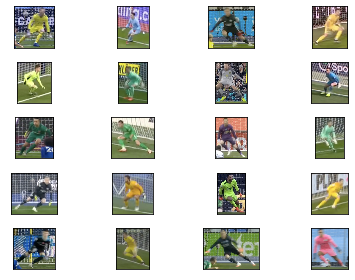

In [38]:
showClusterExamplesImg(kmeans_raw.labels_, pose_arr, n_examples, k)

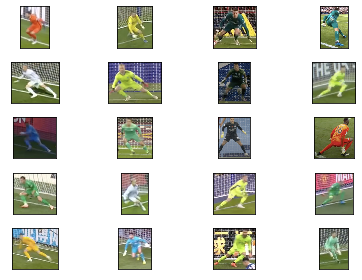

In [39]:
showClusterExamplesImg(kmeans_clean.labels_, clean_poses, n_examples, k)

<IPython.core.display.Javascript object>


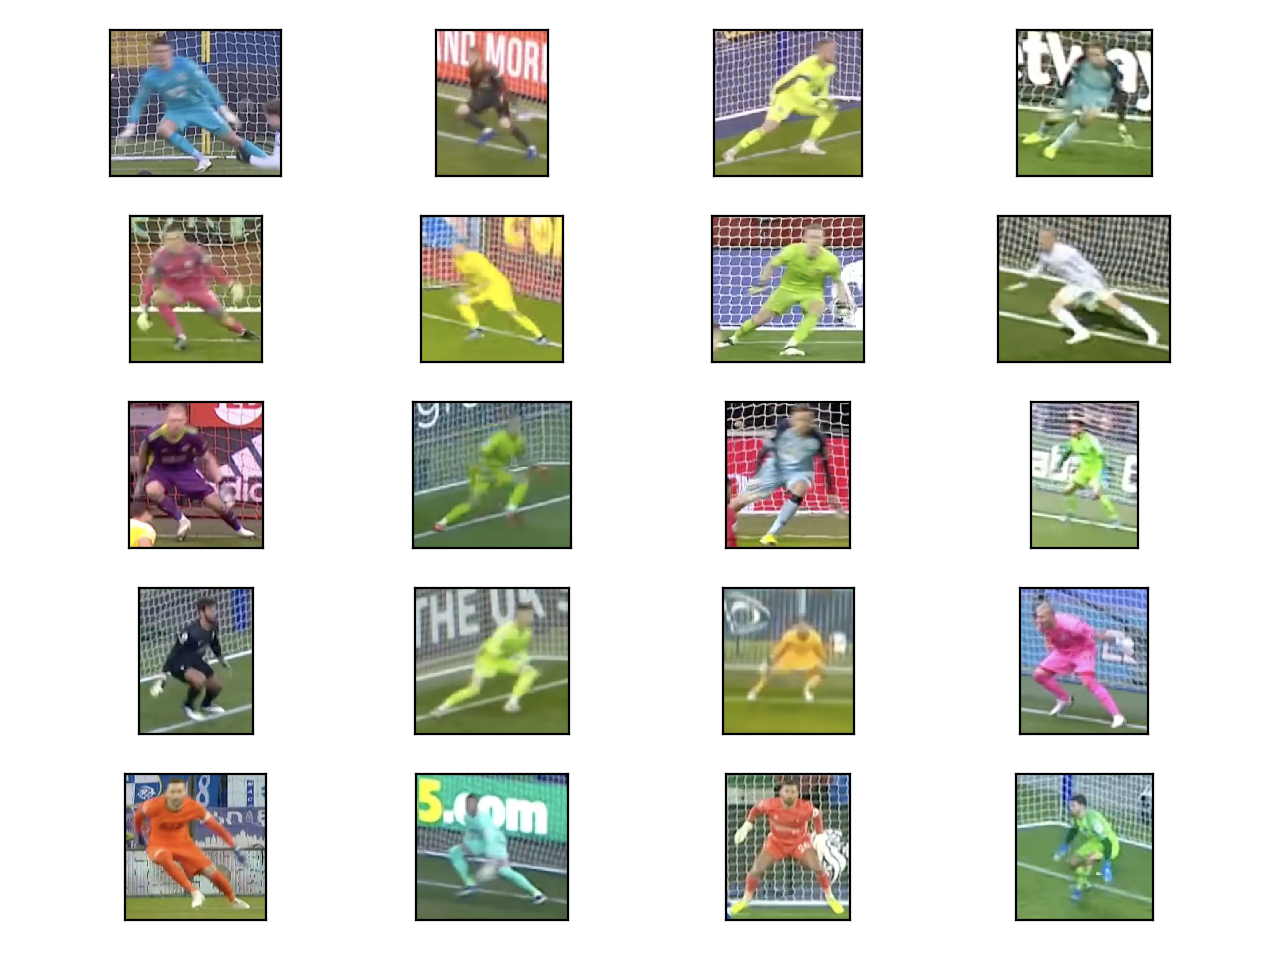

In [185]:
showClusterExamplesImg(kmeans_features.labels_, clean_poses, n_examples, k)

<IPython.core.display.Javascript object>


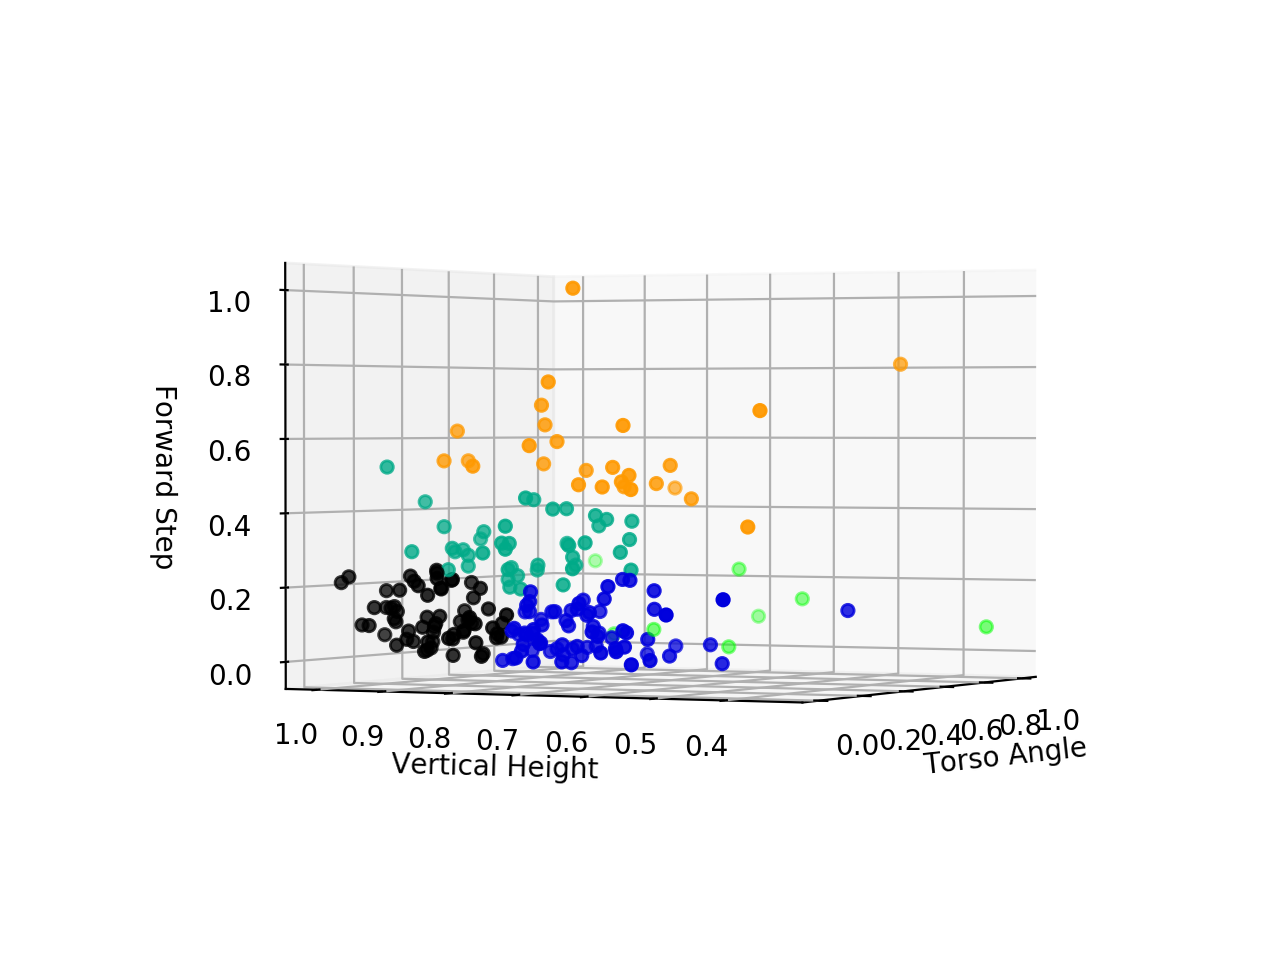

In [22]:
#Plot the 3d feature space
#colors_kmeans = cm.nipy_spectral(clusters_kmeans.astype(float) / k)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(poses_features[:, 0], poses_features[:, 1], poses_features[:, 2], c=colors_kmeans)
ax.set_xlabel('Torso Angle')
ax.set_ylabel('Vertical Height')
ax.set_zlabel('Forward Step')
plt.show()

### Gaussian Mixture Model

In [40]:
from sklearn.mixture import GaussianMixture

In [41]:
#AIC and BIC to find optimal value of k for GMM
aic = []
bic = []
for k in range(2, 11):
    gmm = GaussianMixture(n_components=k, n_init=1)
    gmm.fit(poses_features)
    aic.append(gmm.aic(poses_features))
    bic.append(gmm.bic(poses_features))

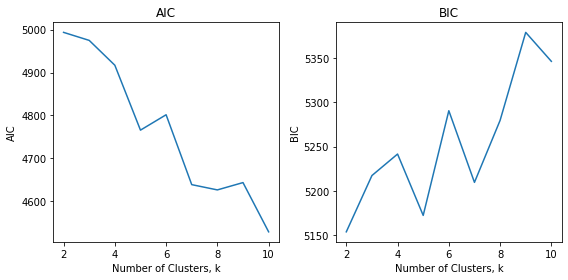

In [42]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
ax[0].plot(list(range(2, 11)), aic)
ax[0].set_title('AIC')
ax[0].set_xlabel('Number of Clusters, k')
ax[0].set_ylabel('AIC')
ax[1].plot(list(range(2, 11)), bic)
ax[1].set_title('BIC')
ax[1].set_xlabel('Number of Clusters, k')
ax[1].set_ylabel('BIC')
plt.tight_layout()
plt.show()

In [43]:
def getGMM(poses, k):
    gmm = GaussianMixture(n_components=k, n_init=10)
    clusters_gmm = gmm.fit_predict(poses)
    return clusters_gmm

In [44]:
k=4
gmm_raw = getGMM(pose_arr, k)

In [45]:
gmm_clean = getGMM(clean_poses, k)

In [46]:
gmm_features = getGMM(poses_features, k)

In [47]:
np.where(gmm_features == 1)

(array([  4,  79, 118, 129]),)

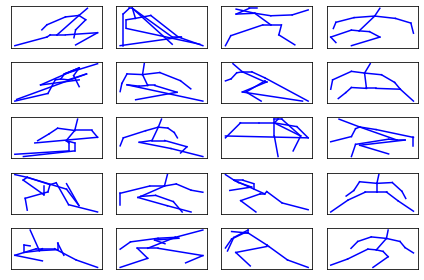

In [48]:
showClusterExamples(gmm_raw, pose_arr, n_examples=5, k=k)

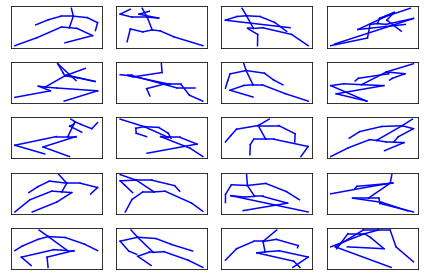

In [49]:
showClusterExamples(gmm_clean, clean_poses, n_examples=5, k=k)

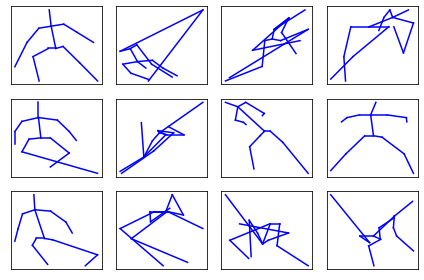

In [57]:
showClusterExamples(gmm_features, clean_poses, n_examples=3, k=k)

<IPython.core.display.Javascript object>


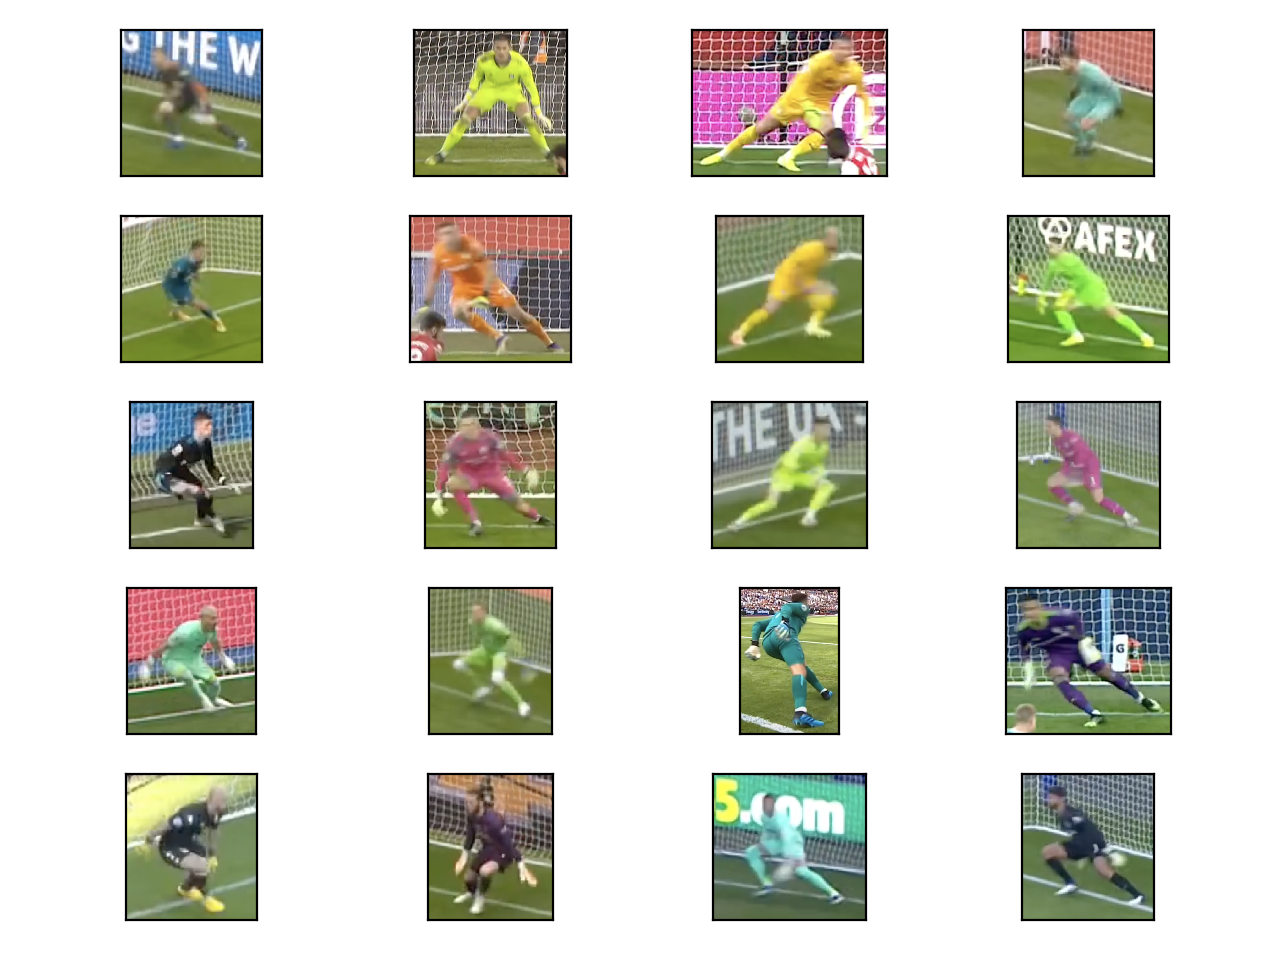

In [198]:
showClusterExamplesImg(gmm_raw, pose_arr, n_examples=5, k=k)

<IPython.core.display.Javascript object>


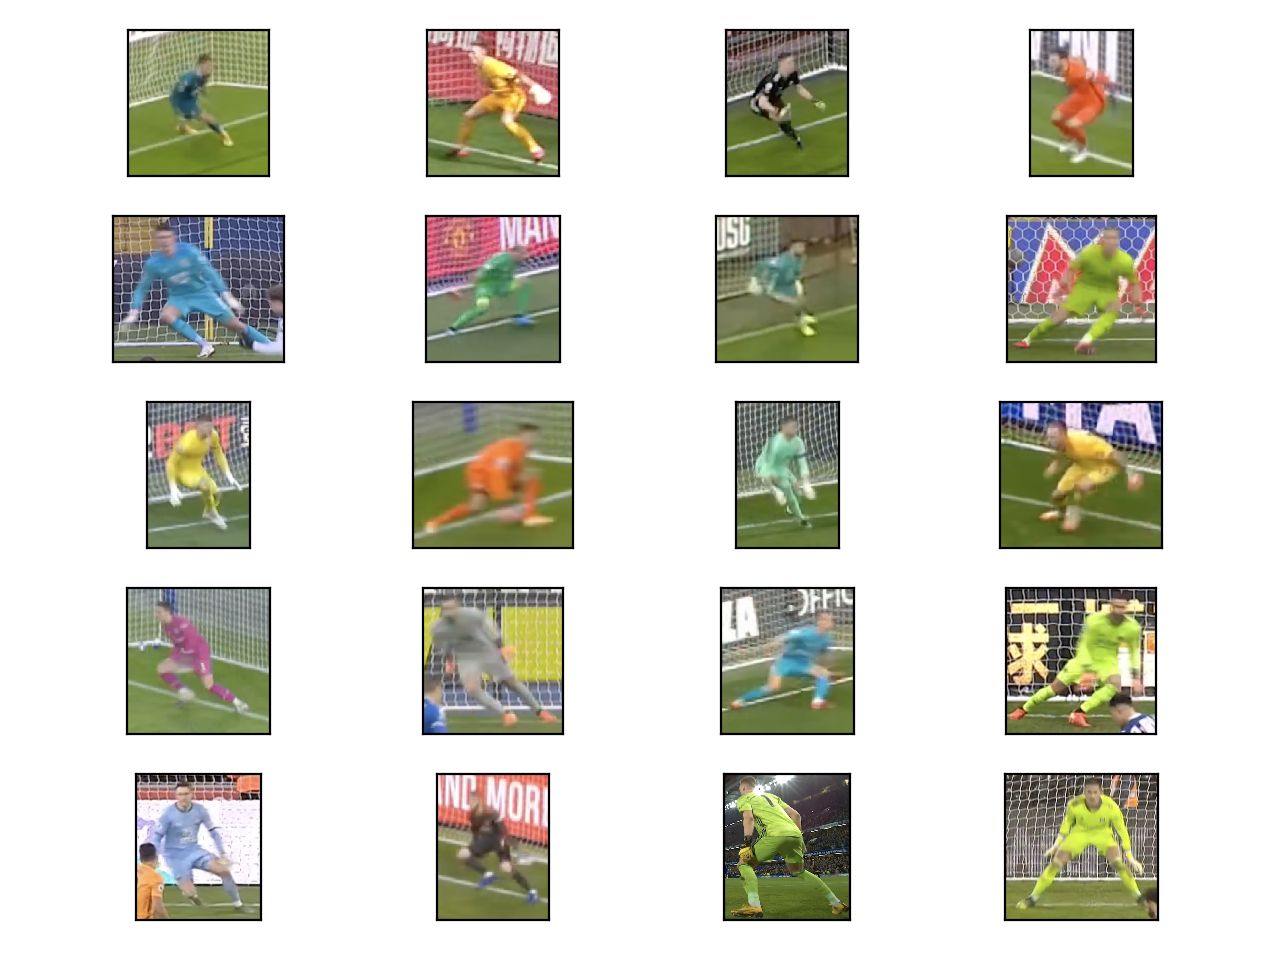

In [199]:
showClusterExamplesImg(gmm_clean, clean_poses, n_examples=5, k=k)

<IPython.core.display.Javascript object>


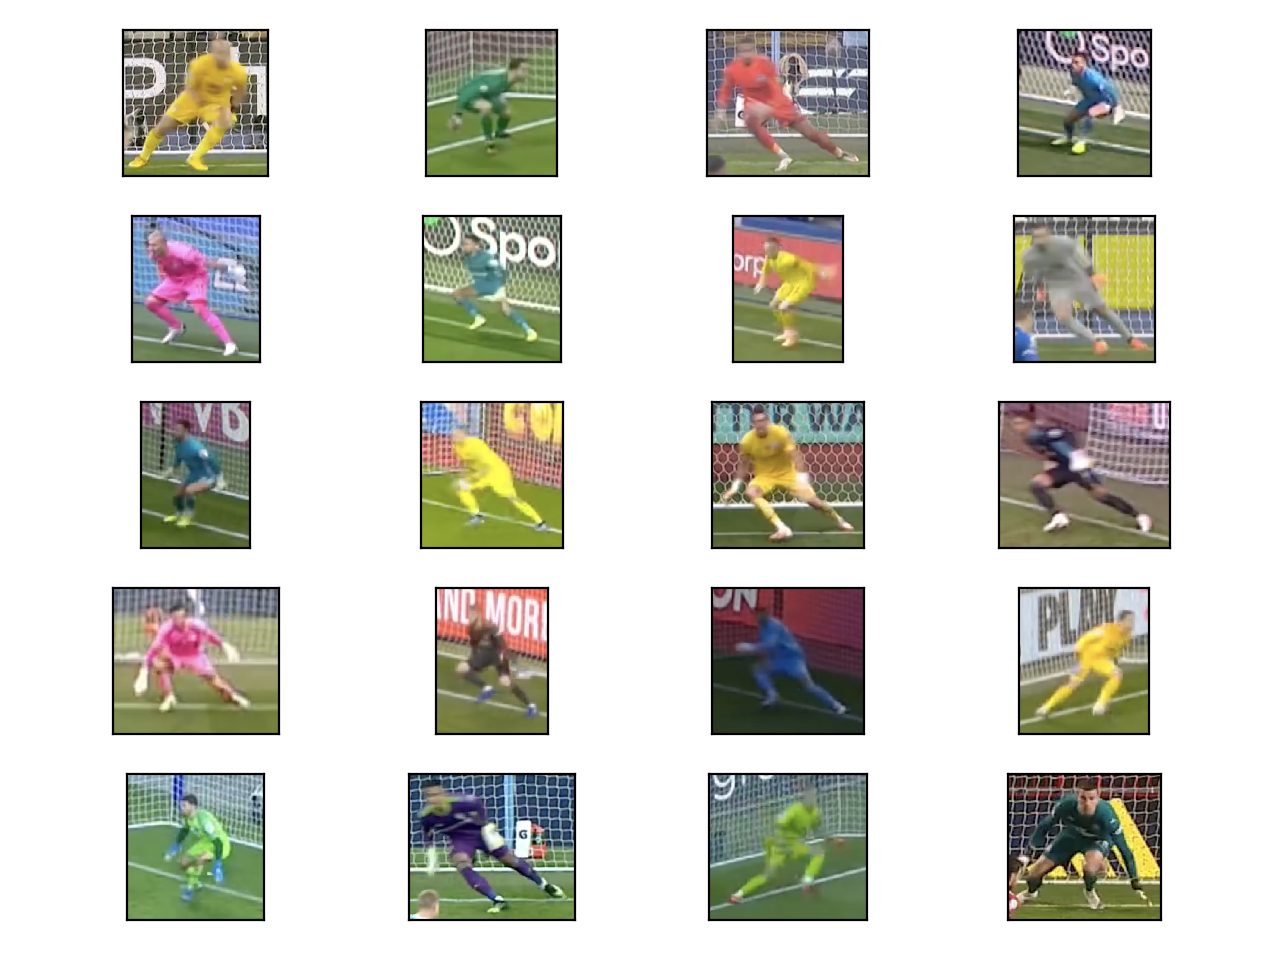

In [208]:
showClusterExamplesImg(gmm_features, clean_poses, n_examples=5, k=k)

<IPython.core.display.Javascript object>


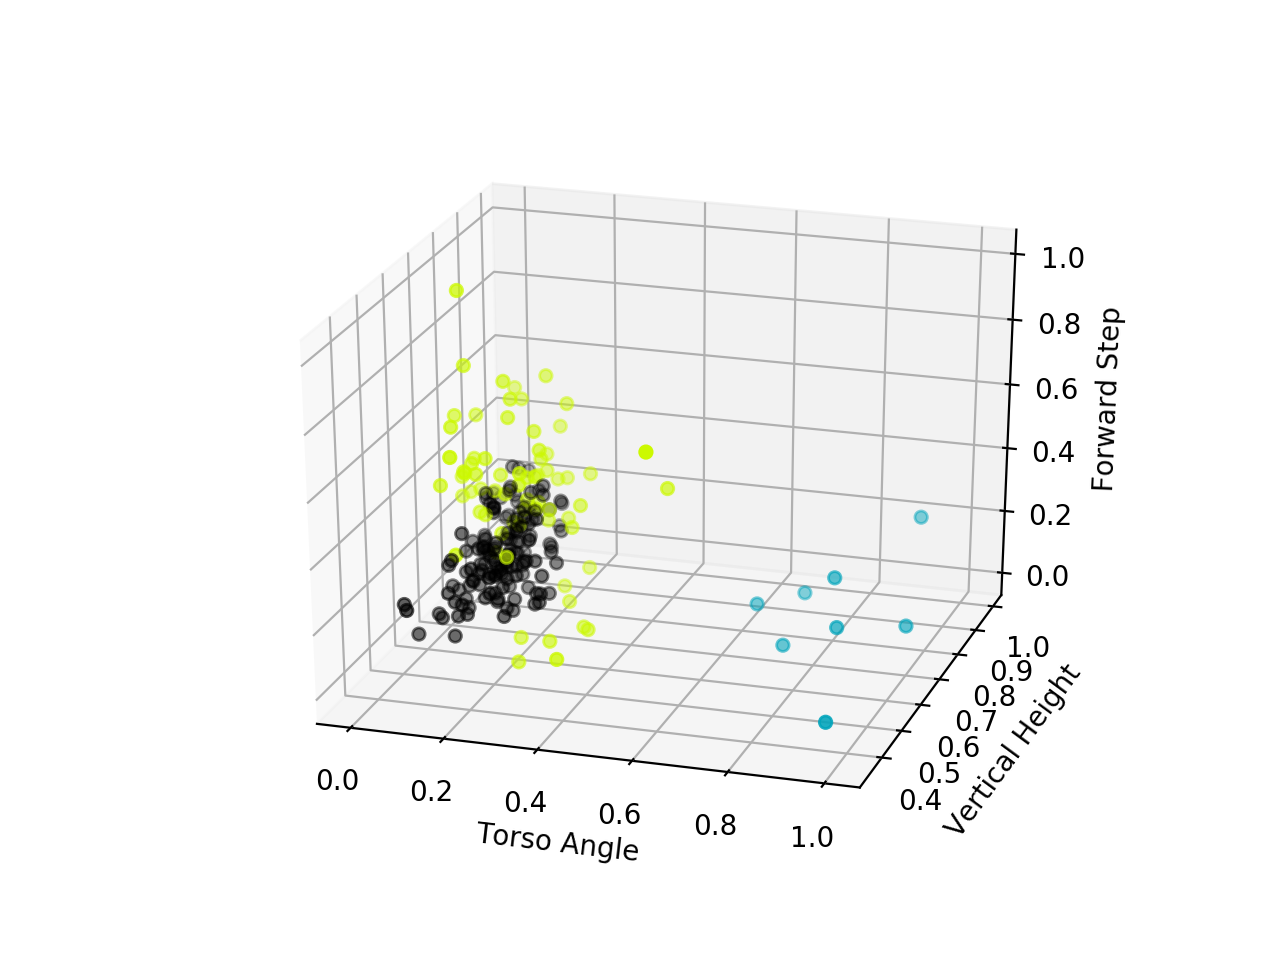

In [68]:
#Plot the 3d feature space
colors_gmm = cm.nipy_spectral(clusters_gmm.astype(float) / k)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(poses_features[:, 0], poses_features[:, 1], poses_features[:, 2], c=colors_gmm)
ax.set_xlabel('Torso Angle')
ax.set_ylabel('Vertical Height')
ax.set_zlabel('Forward Step')
plt.show()

### Mean Shift Clustering
Does not produce good clusters. Most instances belong to the same class. Produces 4 classes, but only very few in all but one of them

In [23]:
from sklearn.cluster import MeanShift

In [53]:
mean_shift = MeanShift().fit_predict(pose_arr)

In [54]:
mean_shift

array([0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

### Hierarchical Clustering

In [56]:
from sklearn.cluster import AgglomerativeClustering

In [69]:
k=5
hier = AgglomerativeClustering(n_clusters = k, affinity='euclidean', linkage='ward').fit_predict(pose_arr)

In [70]:
np.where(hier == 1)

(array([  1,   7,   9,  12,  15,  19,  20,  24,  25,  28,  29,  37,  40,
         41,  44,  52,  53,  58,  62,  63,  74,  75,  77,  80,  82,  88,
         89,  93,  94,  95, 100, 101, 102, 106, 109, 110, 111, 112, 113,
        115, 120, 124, 128, 133, 135, 140, 141, 146, 148, 150, 153, 168,
        169, 175, 180, 184, 185, 191, 196, 197, 199, 201, 204, 207, 212]),)

### DBSCAN

In [72]:
from sklearn.cluster import DBSCAN

In [91]:
dbscan = DBSCAN(eps=8, min_samples=2).fit_predict(pose_arr)

In [92]:
dbscan

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

## Dimensionality Reduction / Manifold Learning
### t-Stochastic Neighbourhood Embedding

In [52]:
from sklearn.manifold import TSNE

In [53]:
def plotTSNE(tsne_embedded, kmeans, gmm, k):
    #Plot 2D t-SNE plot, colors indicate clusters
    colors_gmm = cm.nipy_spectral(gmm.astype(float) / k)
    colors_kmeans = cm.nipy_spectral(kmeans.astype(float) / k)
    #colors_kmeans = cm.nipy_spectral(hier.astype(float) / 5)
    #colors_kmeans = cm.nipy_spectral(mean_shift.astype(float) / len(np.unique(mean_shift)))
    fig,ax = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))
    ax[0].scatter(tsne_embedded[:,0], tsne_embedded[:,1], c=colors_kmeans)
    ax[0].set_title('K-Means')
    ax[1].scatter(tsne_embedded[:,0], tsne_embedded[:,1], c=colors_gmm)
    ax[1].set_title('Gaussian Mixture Model')
    plt.suptitle('t-SNE Embedding of 3D Body Pose')
    plt.show()

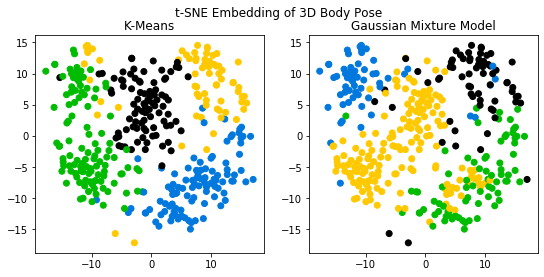

In [54]:
k=4
tsne_embedded = TSNE(n_components=2).fit_transform(pose_arr)
plotTSNE(tsne_embedded, kmeans_raw.labels_, gmm_raw, k=k)

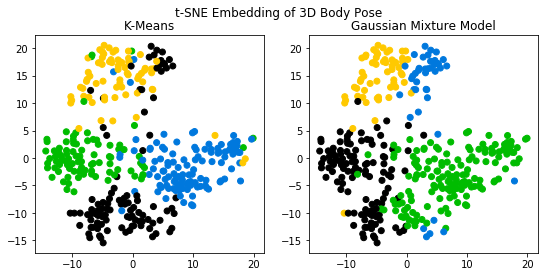

In [55]:
tsne_embedded = TSNE(n_components=2).fit_transform(clean_poses)
plotTSNE(tsne_embedded, kmeans_clean.labels_, gmm_clean, k=k)

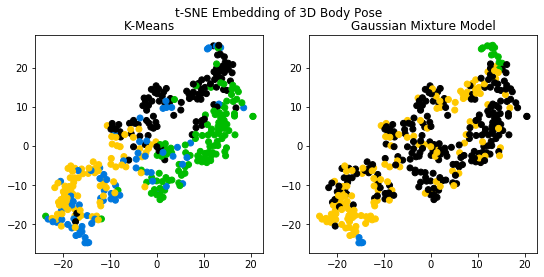

In [56]:
tsne_embedded = TSNE(n_components=2).fit_transform(poses_features)
plotTSNE(tsne_embedded, kmeans_features.labels_, gmm_features, k=k)

### Isomap

In [23]:
from sklearn.manifold import Isomap

In [24]:
isomap_embedding = Isomap(n_components=2, n_neighbors=10).fit_transform(pose_arr)

<IPython.core.display.Javascript object>


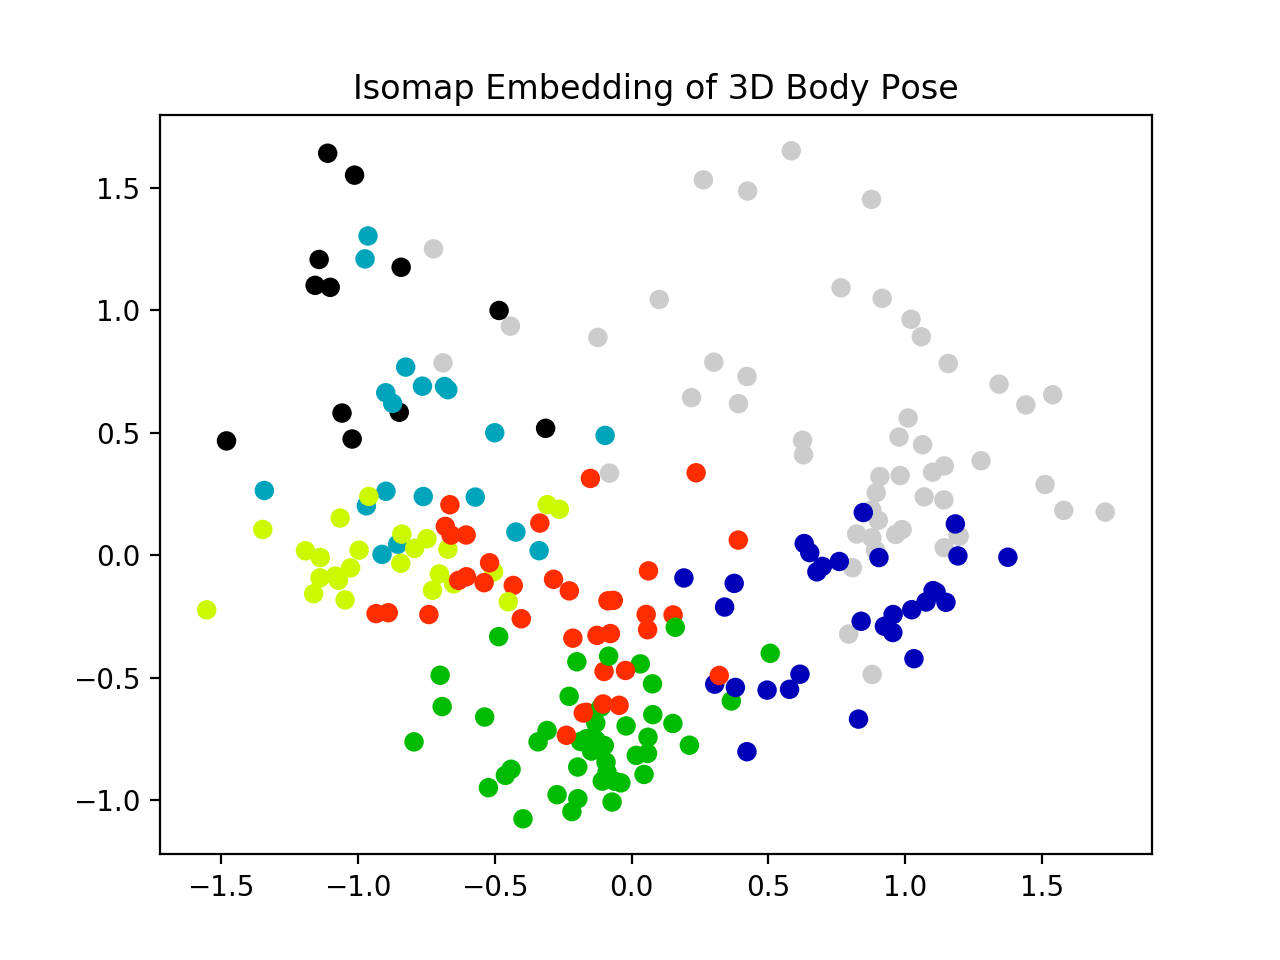

In [25]:
colors = cm.nipy_spectral(clusters.astype(float) / k)
plt.scatter(isomap_embedding[:,0], isomap_embedding[:,1], c=colors)
plt.title('Isomap Embedding of 3D Body Pose')
plt.show()

### Locally Linear Embedding

In [41]:
from sklearn.manifold import LocallyLinearEmbedding

In [48]:
lle_embedding = LocallyLinearEmbedding(n_components=2, n_neighbors=5).fit_transform(pose_arr)

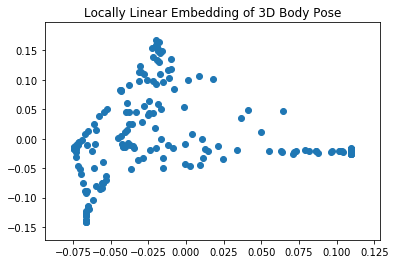

In [49]:
plt.scatter(lle_embedding[:,0], lle_embedding[:,1])
plt.title('Locally Linear Embedding of 3D Body Pose')
plt.show()

### Multi-dimensional Scaling

In [50]:
from sklearn.manifold import MDS

In [55]:
mds_embedding = MDS(n_components=2, metric=True).fit_transform(pose_arr)

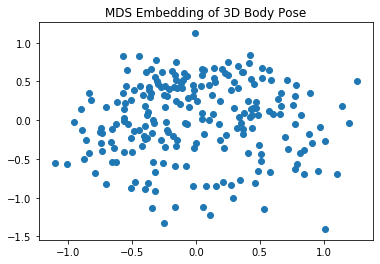

In [56]:
plt.scatter(mds_embedding[:,0], mds_embedding[:,1])
plt.title('MDS Embedding of 3D Body Pose')
plt.show()

### Principal Component Analysis

In [86]:
from sklearn.decomposition import PCA

In [87]:
pca = PCA(n_components=2).fit_transform(poses_features)

<IPython.core.display.Javascript object>


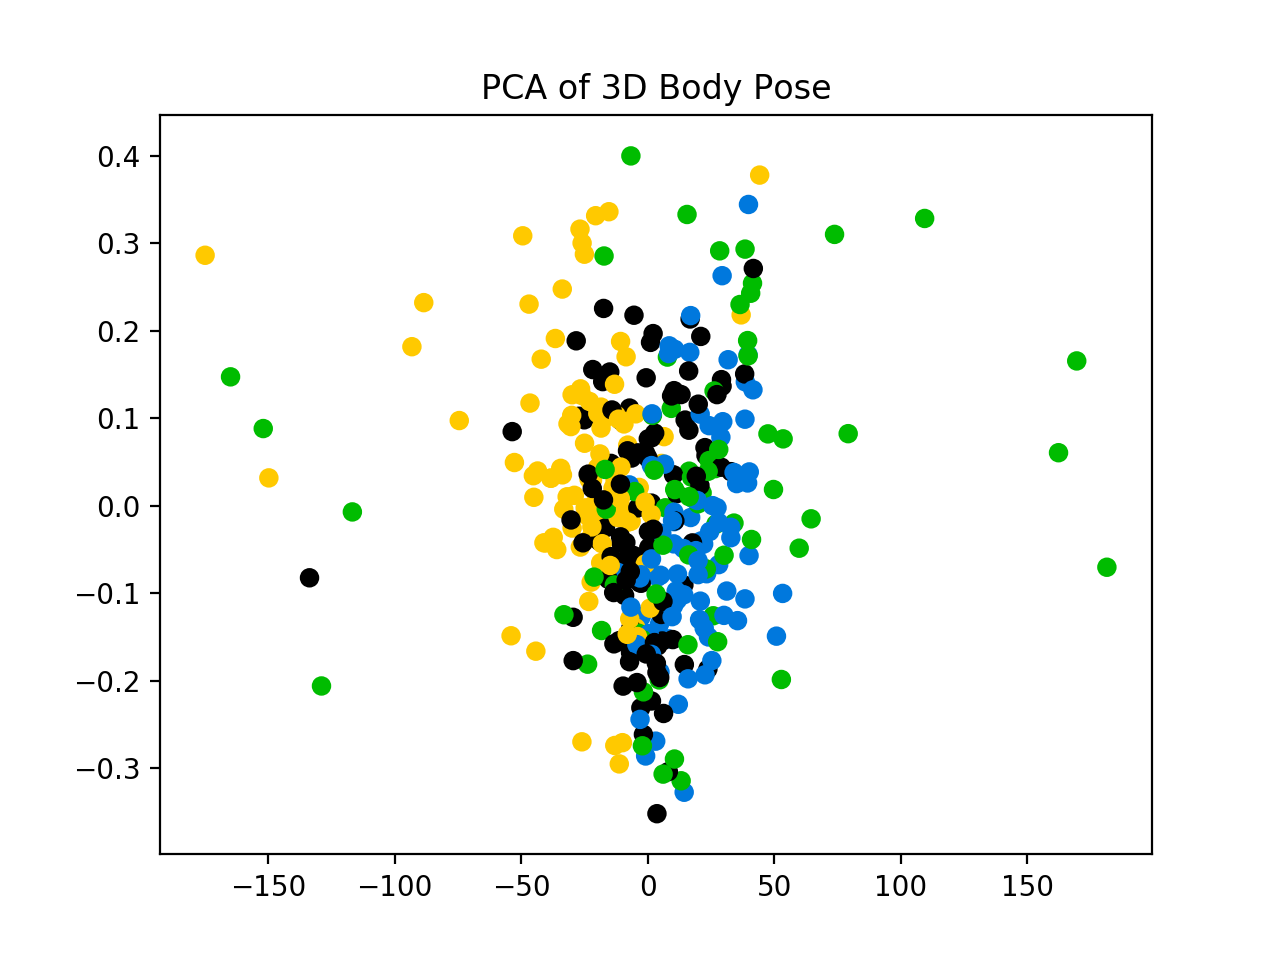

In [88]:
colors = cm.nipy_spectral(kmeans_features.labels_.astype(float) / k)
plt.scatter(pca[:,0], pca[:,1], c=colors)
plt.title('PCA of 3D Body Pose')
plt.show()

## Expected Penalty Save Model - Classification

In [44]:
#Fill NA's with 0 in off_target column
pose_3d_df['off_target'].fillna(0, inplace=True)
#Add cluster assignments to DF
pose_3d_df['clusters'] = clusters_kmeans
#Remove penalties that were off target
pose_3d_df = pose_3d_df[pose_3d_df['off_target'] == 0].copy()
#Keep the index so can keep track of what photo refers to what observation and reset index
pose_3d_df.reset_index(level=0, inplace=True)

In [58]:
pose_3d_df.head()

index        goalkeepers  \
0      0   Łukasz Fabiański   
1      1  Kepa Arrizabalaga   
2      2         Tom Heaton   
3      3       Rui Patrício   
4      5         Ben Foster   

                                                 url        pen_taker outcome  \
0  /en/matches/71c8a43e/West-Ham-United-Mancheste...    Sergio Agüero  Scored   
1  /en/matches/d0583d0d/Manchester-United-Chelsea...  Marcus Rashford  Scored   
2  /en/matches/7ad0ed82/Aston-Villa-Bournemouth-A...      Joshua King  Scored   
3  /en/matches/d8a7f871/Wolverhampton-Wanderers-M...       Paul Pogba  Missed   
4  /en/matches/89fbf2a3/Watford-West-Ham-United-A...       Mark Noble  Scored   

   off_target         0         1         2         3  ...        39  \
0         0.0  0.156250  0.500000 -0.121990  0.125000  ...  0.031250   
1         0.0 -0.062500  0.250000 -0.019149 -0.171875  ... -0.156250   
2         0.0 -0.312500  0.296875  0.020156 -0.125000  ...  0.171875   
3         0.0  0.359375  0.281250  0.114260  0.250000  ...  0.296875   
4         0.0 -0.203125  0.250000  0.038489 -0.203125  ... -0.031250   

         40        41        42        43        44        45       46  \
0 -0.171875  0.071426 -0.140625 -0.078125  0.095242 -0.171875  0.06250   
1 -0.187500 -0.079030 -0.078125 -0.140625 -0.132560 -0.078125 -0.06250   
2 -0.125000  0.053451  0.171875 -0.031250  0.088715  0.265625  0.03125   
3 -0.187500  0.027412  0.312500 -0.109375  0.123128  0.296875 -0.06250   
4 -0.015625 -0.109567 -0.062500  0.046875 -0.013181 -0.125000  0.09375   

         47  clusters  
0  0.078947         5  
1 -0.082005         1  
2  0.073190         4  
3  0.127119         5  
4  0.004897         2  

[5 rows x 55 columns]

In [50]:
#15.5% of penalties that are on target were saved
np.mean(y)

0.1553398058252427

In [55]:
#Create target and predictive variables
y = np.array((pose_3d_df['outcome'] == 'Missed').astype(int))
X = pd.get_dummies(pose_3d_df['clusters']).values

### Logistic Regression - Statsmodels

In [59]:
import statsmodels.api as sm

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [63]:
log_reg = sm.Logit(y, X).fit()

         Current function value: 0.422164
         Iterations: 35


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [64]:
log_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  206
Model:                          Logit   Df Residuals:                      200
Method:                           MLE   Df Model:                            5
Date:                Tue, 29 Jun 2021   Pseudo R-squ.:                 0.02245
Time:                        13:13:11   Log-Likelihood:                -86.966
converged:                      False   LL-Null:                       -88.963
Covariance Type:            nonrobust   LLR p-value:                    0.5501
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -1.7579      0.484     -3.630      0.000      -2.707      -0.809
x2            -1.5686      0.348     -4.513      0.000      -2.250      -0.887
x3           -23.5747   4.16e+04     -0.001      1.000   -8.16e+04    8.15e+04
x4            -1.7707      0.382     -4.630      0.000      -2.520      -1.021
x5            -1.6094      0.490     -3.285      0.001      -2.570      -0.649
x6            -1.3218      0.563     -2.349      0.019      -2.425      -0.219
==============================================================================
"""

In [76]:
from sklearn.linear_model import LogisticRegression

In [77]:
lr = LogisticRegression(random_state=0).fit(X, y)

In [78]:
lr.predict_proba(np.array([[1,0,0,0,0,0],
                            [0,1,0,0,0,0],
                            [0,0,1,0,0,0],
                            [0,0,0,1,0,0],
                            [0,0,0,0,1,0],
                            [0,0,0,0,0,1]]))

array([[0.85370783, 0.14629217],
       [0.83098994, 0.16901006],
       [0.92612664, 0.07387336],
       [0.85485104, 0.14514896],
       [0.83817803, 0.16182197],
       [0.80804259, 0.19195741]])

In [80]:
np.where(clusters_kmeans == 5)

(array([  0,   3,   6,   8,  28,  30,  83,  92,  97, 108, 109, 122, 161,
        165, 166, 167, 172, 180, 193, 203]),)

### SVM

In [65]:
from sklearn.svm import SVC

In [71]:
svm = SVC(probability=True).fit(X, y)

In [75]:
svm.predict_proba(np.array([[1,0,0,0,0,0],
                            [0,1,0,0,0,0],
                            [0,0,1,0,0,0],
                            [0,0,0,1,0,0],
                            [0,0,0,0,1,0],
                            [0,0,0,0,0,1]]))

array([[0.84442946, 0.15557054],
       [0.84442946, 0.15557054],
       [0.84442946, 0.15557054],
       [0.84442946, 0.15557054],
       [0.84442946, 0.15557054],
       [0.84442946, 0.15557054]])